### US Trade of Printed Books, Newspapers, Pictures vs GDP & Internet Usage 1990 - 2010

#### dataset taken from http://data.un.org/Data.aspx?d=ComTrade&f=_l1Code%3a50


In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
printed_trade = pd.read_csv('data/printed_goods_world_trade.csv')\
	.drop(columns=['Weight (kg)'])\
	.rename(columns={
		'Country or Area': 'country',
		'Trade (USD)': 'printed_trade_usd'
	})\
	.rename(columns=str.lower)\
	.replace(to_replace='USA', value='United States')\
	.dropna(subset=['printed_trade_usd'])\
	.pivot_table(
		index=['country', 'year'],
		values='printed_trade_usd',
		aggfunc=np.sum
	)

In [9]:
printed_trade.head()

printed_trade_usd
country year                   
Albania 1996          6142394.0
        1997          6782503.0
        1998          6911066.0
        1999          4952458.0
        2000          3407583.0

In [13]:
def round_2(n: float):
	if n == '':
		return
	try:
		return float(np.format_float_positional(float(n), precision=2))
	except Exception:
		print(f'Unable to convert {n} to float')

gdp = pd\
    .read_csv('data/gdp_per_capita.csv', converters={'Value': round_2})\
    .drop(columns=['Value Footnotes']) \
    .rename(columns={'Country or Area': 'country', 'Value': 'gdp_per_capita'})\
	.rename(columns=str.lower)\
    .dropna(subset=['gdp_per_capita']) \
    .astype({'year': int})

In [12]:
gdp.head()

,country,year,gdp_per_capita
0,Afghanistan,2019,2065.04
1,Afghanistan,2018,2033.78
2,Afghanistan,2017,2058.38
3,Afghanistan,2016,2057.06
4,Afghanistan,2015,2068.27


In [14]:
def is_year_filter(obj):
	try:
		datetime.strptime(obj, '%Y')
		return obj
	except Exception:
		return

def is_numeric_filter(obj):
	try:
		float(obj)
		return obj
	except Exception:
		return

internet = pd.read_csv(
	'data/internet_use.csv',
	converters=
	{
		'Year': is_year_filter,
		'Value': is_numeric_filter
	})\
	.dropna(subset=['Year', 'Value'])\
	.drop(columns=['Value Footnotes'])\
	.rename(columns={'Country or Area': 'Country', 'Value': 'internet_use_pct'})\
	.rename(columns=str.lower)\
	.astype({'year': int, 'internet_use_pct': float})

In [15]:
internet.head()

,country,year,internet_use_pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [18]:
gdp_internet_printed = gdp\
	.merge(internet, on=['country', 'year'])\
	.merge(
		printed_trade,
		on=['country', 'year'])\
	.rename(columns=str.lower)\
	.set_index(['country', 'year'])

In [19]:
gdp_internet_printed.head()

gdp_per_capita  internet_use_pct  printed_trade_usd
country year                                                     
Albania 2012        11263.85         54.655959         21113586.0
        2011        11088.09         49.000000         19920103.0
        2010        10783.82         45.000000         23086167.0
        2009        10346.86         41.200000         17780646.0
        2008         9944.23         23.860000         16706161.0

In [29]:
usa = gdp_internet_printed.loc['United States']

def normalize(dataframe, column_name):
    def _normalize(val, max):
        return val / max
    
    dataframe[column_name] = dataframe[column_name].apply(lambda x: _normalize(x, dataframe[column_name].max()))


for column_name in usa.columns.values:
    normalize(usa, column_name)

<AxesSubplot:xlabel='year'>

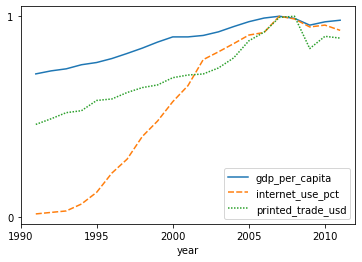

In [34]:
plt.rcParams['figure.facecolor'] = 'white'

fig, ax = plt.subplots()
ax.locator_params(integer=True)

sns.lineplot(data=usa)